In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
titanic = pd.read_csv('data/titanic_train.csv')
titanic_test = pd.read_csv('data/titanic_test.csv')
titanic_combined = pd.concat([titanic, titanic_test], ignore_index=True)
titanic_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## Data Analysis

Survival based on sex

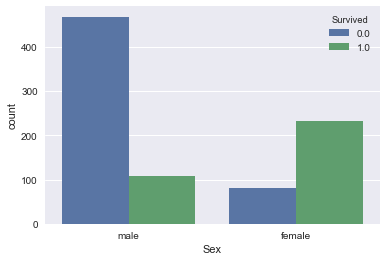

In [3]:
sb.countplot(x='Sex', data = titanic_combined, hue = 'Survived')

Survival based on class

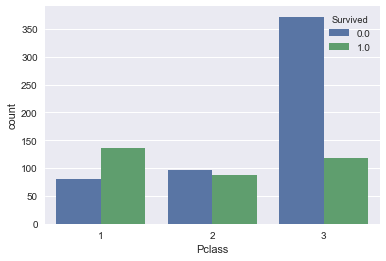

In [4]:
sb.countplot(x='Pclass', data = titanic_combined, hue = 'Survived')

Survival based on age
Childern had high survival rate than adults

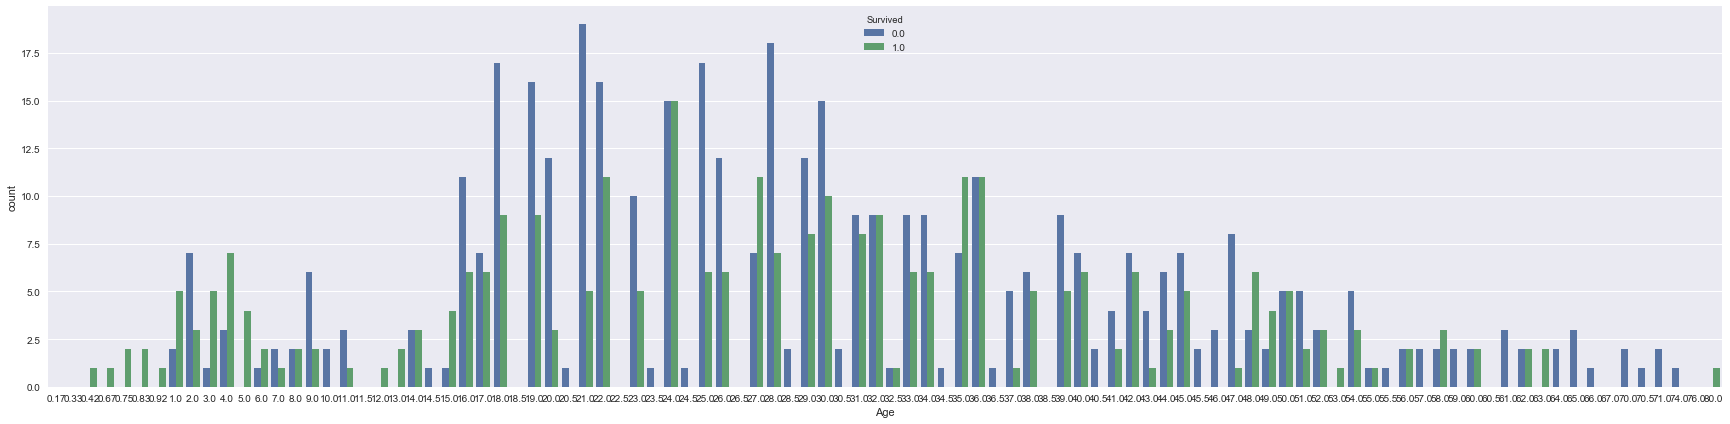

In [5]:
plt.figure(figsize=(30, 7))
sb.countplot(x='Age', data = titanic_combined, hue = 'Survived')

## Handling missing data

### Missing Fare

Taking median fare of Pclass=3 passengers embarked from S 

In [6]:
titanic_combined[titanic_combined['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [7]:
fare_impute = titanic_combined[(titanic_combined['Embarked'] == 'S') & (titanic_combined['Pclass'] == 3)]['Fare'].median()
titanic_combined['Fare'].fillna(fare_impute, inplace=True)

### Missing Embarked

Seems like these ladies were together as they have same ticket and cabin number. Look at the fares for class 1 based on Embarked port

In [8]:
titanic_combined[titanic_combined['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


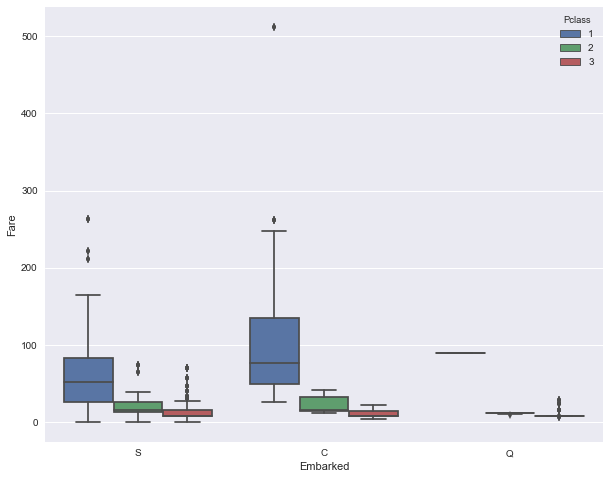

In [9]:
plt.figure(figsize=(10,8))
sb.boxplot(x='Embarked', y='Fare', hue='Pclass', data=titanic_combined)

In [10]:
titanic_combined['Embarked'].fillna('C', inplace=True)

### Missing age
we will create model for predicting missing age as there are lots of them missing. But before that we would like to crate more features

## Create More Features

### Deck 
First character in cabin is deck number

In [11]:
titanic_combined['Deck'] = titanic_combined['Cabin'].apply(lambda x: 'NA' if type(x) == float else x[0])
titanic_combined.drop(['Cabin'], axis = 1, inplace=True)

### Title
Extracting title from name

In [12]:
titanic_combined['Title'] = titanic_combined['Name'].apply(lambda x: x.split(',')[1].split('.')[0][1:])
titanic_combined.drop(['Name'], axis = 1, inplace=True)

### Ticket Prefix

In [13]:
titanic_combined['Ticket_Prefix'] = titanic_combined['Ticket']\
                                        .apply(lambda x: x.split()[0]\
                                        .lower().replace('.','')\
                                        .replace('/','') if len(x.split())==2 else 'na')
titanic_combined.drop(['Ticket'], axis = 1, inplace=True)

### Family Size

In [14]:
titanic_combined['Family_Size'] = titanic_combined['Parch'] + titanic_combined['SibSp'] + 1

### One-hot encoding for categorical data

In [15]:
titanic_combined.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Deck,Title,Ticket_Prefix,Family_Size
0,22.0,S,7.2500,0,1,3,male,1,0.0,NA,Mr,a5,2
1,38.0,C,71.2833,0,2,1,female,1,1.0,C,Mrs,pc,2
2,26.0,S,7.9250,0,3,3,female,0,1.0,NA,Miss,stono2,1
3,35.0,S,53.1000,0,4,1,female,1,1.0,C,Mrs,na,2
4,35.0,S,8.0500,0,5,3,male,0,0.0,NA,Mr,na,1


In [16]:
embarked = pd.get_dummies(titanic_combined['Embarked'], prefix='Embarked', drop_first=True)
sex = pd.get_dummies(titanic_combined['Sex'], drop_first=True)
deck = pd.get_dummies(titanic_combined['Deck'], prefix='Deck')
title = pd.get_dummies(titanic_combined['Title'], prefix='Title')
ticket = pd.get_dummies(titanic_combined['Ticket_Prefix'], prefix='Ticket_Prefix')

titanic_combined = pd.concat([titanic_combined, embarked, sex, deck, title, ticket], axis=1)
titanic_combined.drop(['Embarked', 'Sex', 'Deck', 'Title', 'Ticket_Prefix'], axis = 1, inplace=True)


In [17]:
print(titanic_combined.columns)
print("Number of columns {}".format(len(titanic_combined.columns)))

Index(['Age', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'SibSp', 'Survived',
       'Family_Size', 'Embarked_Q', 'Embarked_S', 'male', 'Deck_A', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_NA', 'Deck_T',
       'Title_Capt', 'Title_Col', 'Title_Don', 'Title_Dona', 'Title_Dr',
       'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master',
       'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs',
       'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess',
       'Ticket_Prefix_a4', 'Ticket_Prefix_a5', 'Ticket_Prefix_aq3',
       'Ticket_Prefix_aq4', 'Ticket_Prefix_as', 'Ticket_Prefix_c',
       'Ticket_Prefix_ca', 'Ticket_Prefix_casoton', 'Ticket_Prefix_fa',
       'Ticket_Prefix_fc', 'Ticket_Prefix_fcc', 'Ticket_Prefix_lp',
       'Ticket_Prefix_na', 'Ticket_Prefix_pc', 'Ticket_Prefix_pp',
       'Ticket_Prefix_ppp', 'Ticket_Prefix_sc', 'Ticket_Prefix_sca3',
       'Ticket_Prefix_sca4', 'Ticket_Prefix_scah', 'Ticket_Prefix_scow',

### Predicting missing age

In [18]:
age_train = titanic_combined[titanic_combined['Age'].notnull()]
age_test = titanic_combined[titanic_combined['Age'].isnull()]

from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV

age_features = ['Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size', 'Embarked_Q', 'Embarked_S', 'male', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_NA', 'Deck_T',
       'Title_Capt', 'Title_Col', 'Title_Don', 'Title_Dona', 'Title_Dr',
       'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master',
       'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs',
       'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess']

param_grid = {'n_estimators': list(range(200,300,10))} 

age_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
age_search.fit(age_train[age_features], age_train['Age'])

age_predict = age_search.predict(age_test[age_features])
titanic_combined.loc[ (titanic_combined.Age.isnull()), 'Age' ] = age_predict 

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Trying Ensamble and SVM

In [19]:
titanic = titanic_combined.iloc[:891]
titanic_test = titanic_combined.iloc[891:]

X = titanic.drop(['PassengerId', 'Survived'], axis=1)
y = titanic['Survived']
X_test = titanic_test.drop(['PassengerId', 'Survived'], axis=1)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

param_grid = {
                 'n_estimators': list(range(200,310,10)),
                 'criterion': ['gini','entropy']
                 }

EnsambleModel = Pipeline([
    ('Scaler', StandardScaler()),
    ('Feature Selection', SelectFromModel(ExtraTreesClassifier(n_estimators=300))),
    ('Model Selection', GridSearchCV(RandomForestClassifier(), param_grid, cv=5))
])

EnsambleModel.fit(X,y)
print('Best score: {}'.format(EnsambleModel.steps[2][1].best_score_))
print('Best parameters: {}'.format(EnsambleModel.steps[2][1].best_params_))

Best score: 0.8181818181818182
Best parameters: {'criterion': 'gini', 'n_estimators': 220}


In [21]:
from sklearn.svm import SVC

param_grid = {'C':[.01,.1,1,10,100,1000], 'gamma':[.0001,.001,.01,.1,1,10]}

SVCModel = Pipeline([
    ('Scaler', StandardScaler()),
    ('Feature Selection', SelectFromModel(ExtraTreesClassifier(n_estimators=300))),
    ('Model Selection', GridSearchCV(SVC(kernel='linear'), param_grid, cv=5))
])

SVCModel.fit(X,y)
print('Best score: {}'.format(SVCModel.steps[2][1].best_score_))
print('Best parameters: {}'.format(SVCModel.steps[2][1].best_params_))

Best score: 0.8181818181818182
Best parameters: {'C': 0.1, 'gamma': 0.0001}


In [ ]:
#writing results
y_predict = SVCModel.predict(X_test).astype(int)
y_predict = pd.DataFrame(y_predict, index=titanic_test['PassengerId'], columns=['Survived'])
y_predict.to_csv('svc.csv')

y_predict = EnsambleModel.predict(X_test).astype(int)
y_predict = pd.DataFrame(y_predict, index=titanic_test['PassengerId'], columns=['Survived'])
y_predict.to_csv('ensamble.csv')